# Projet Classification Vaccination

## Introduction

Prédire la probabilité qu'une personne ait reçu ou non les vaccins contre la grippe H1N1 et la grippe saisonnière. Il y aura deux variables cibles (binaires : oui/non), ce qui correspond à un problème de classification supervisée.

Tu dois prédire la probabilité qu'une personne ait reçu ou non les vaccins contre la grippe H1N1 et la grippe saisonnière. Tu auras deux variables cibles (binaires : oui/non), ce qui correspond à un problème de classification supervisée.

## 1. Importation des bibliothèques et chargement des données

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Préparation complète des données

In [2]:
X = pd.read_csv("sup/X.csv")
y = pd.read_csv("sup/y.csv")

### 2.1 Présentation des données (variables, dimensions, types)

In [3]:
print("Dimensions X :", X.info())
print("Dimensions y :", y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### 2.2 Detction des valeurs manquantes

In [4]:
missing = X.isna().sum()
pct    = (missing / len(X) * 100).round(2)
pd.concat([missing, pct], axis=1, keys=["missing", "pct_missing"])[lambda d: d["missing"] > 0]

,missing,pct_missing
h1n1_concern,92,0.34
h1n1_knowledge,116,0.43
behavioral_antiviral_meds,71,0.27
behavioral_avoidance,208,0.78
behavioral_face_mask,19,0.07
behavioral_wash_hands,42,0.16
behavioral_large_gatherings,87,0.33
behavioral_outside_home,82,0.31
behavioral_touch_face,128,0.48
doctor_recc_h1n1,2160,8.09


### 2.3 Gestion des valeurs aberrantes

In [5]:
num_vars = X.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy="median")
X[num_vars] = num_imputer.fit_transform(X[num_vars])

In [6]:
cat_vars = X.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy="most_frequent")
X[cat_vars] = cat_imputer.fit_transform(X[cat_vars])

    ### 2.4 Sélection pertinente des variables (Feature selection)


### 2.5 Normalisation et transformation des variables

In [7]:
X_encoded = pd.get_dummies(X, columns=cat_vars, drop_first=True)


In [8]:

scaler = StandardScaler()
X_encoded[num_vars] = scaler.fit_transform(X_encoded[num_vars])

## Boxplot : score d’opinion vs. vaccination

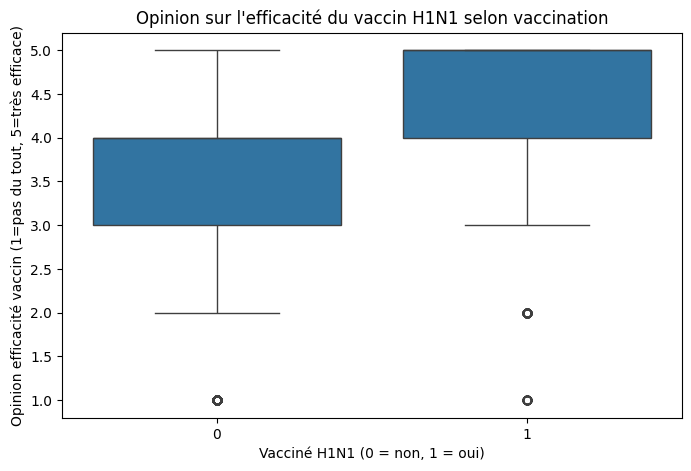

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.concat([X, y], axis=1),
            x='h1n1_vaccine',
            y='opinion_h1n1_vacc_effective')
plt.title("Opinion sur l'efficacité du vaccin H1N1 selon vaccination")
plt.xlabel("Vacciné H1N1 (0 = non, 1 = oui)")
plt.ylabel("Opinion efficacité vaccin (1=pas du tout, 5=très efficace)")
plt.show()

## Boxplot : nombre d’enfants/Adultes vs. vaccination

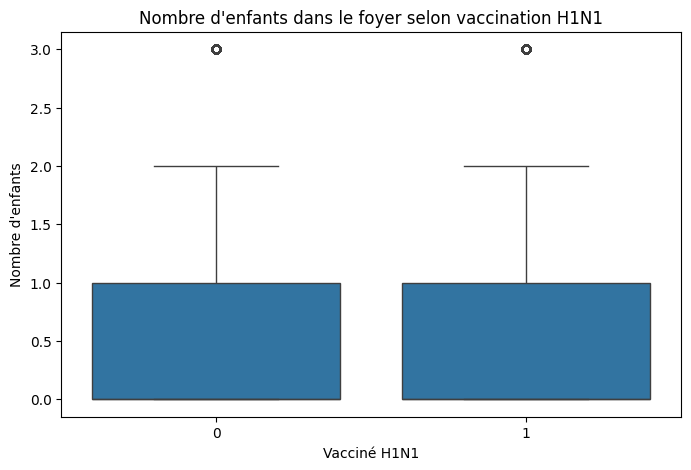

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.concat([X, y], axis=1),
            x='h1n1_vaccine',
            y='household_children')
plt.title("Nombre d'enfants dans le foyer selon vaccination H1N1")
plt.xlabel("Vacciné H1N1")
plt.ylabel("Nombre d'enfants")
plt.show()

## Boxplot : revenu ou statut social vs. vaccination

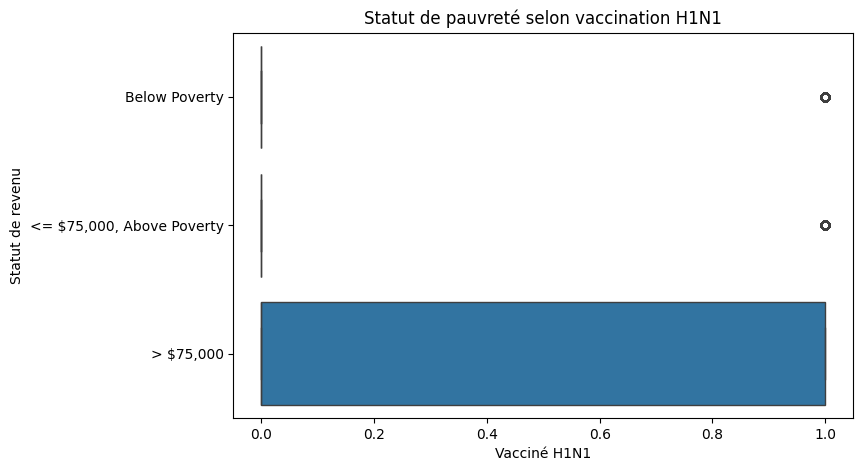

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.concat([X, y], axis=1),
            x='h1n1_vaccine',
            y='income_poverty')
plt.title("Statut de pauvreté selon vaccination H1N1")
plt.xlabel("Vacciné H1N1")
plt.ylabel("Statut de revenu")
plt.show()

## 3. Analyse exploratoire approfondie

### 3.1 Visualisations des variables qualitatives


### 3.2 Visualisations des variables quantitatives

### 3.3 Visualisations croisées (quali x quanti)

### 3.4 Table de corrélation

## 4. Modélisation et évaluation des modèles

### 4.1 Modèle 1 : Régression logistique

#### Évaluation (ROC/AUC, précision, rappel, F-score)

### 4.2 Modèle 2 : Arbres de décision / Forêts aléatoires

#### Évaluation

### 4.3 Modèle 3 : KNN

#### Évaluation

### 4.4 Optimisation des hyperparamètres (Grid Search)

### 4.5 Validation croisée (cross-validation)

### 4.6 Comparaison des modèles et choix final

## 5. Conclusion métier

### Interprétation des résultats, recommandations et conclusion métier.